# Semantic Segmentation
- 이번 실습은 PyTorch HUB에서 semantic segmentation example을 가져와 살펴봅니다.
- https://pytorch.org/hub/pytorch_vision_fcn_resnet101/

## FCN-ResNet101
- Author: Pytorch Team
- Fully-Convolutional Network model with a ResNet-101 backbone

In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from torchvision import transforms

import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

- 웹 또는 구글드라이브에서 시험해볼 영상을 하나 가져와서, preprocessing 후에 output_predictions를 얻습니다.

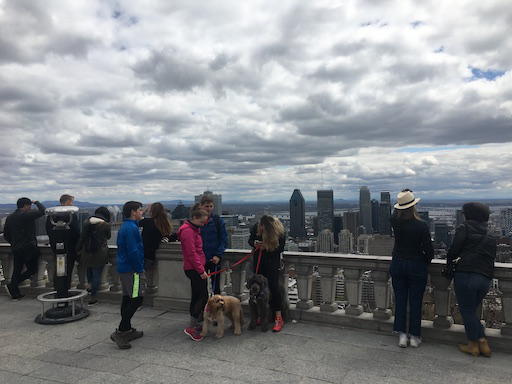

In [2]:
# web image
url  =  'https://raw.githubusercontent.com/hufsbme/T10402101/master/ch13_computer_vision/IMG_6996.jpeg'

input_image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# google drive image
#url  = '/content/drive/My Drive/hufs/image/hufs_campus.png'
#input_image = Image.open(url).convert("RGB")

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

input_image

- 사진 속의 object를 제대로 segmentation하였는지 확인해 봅니다.

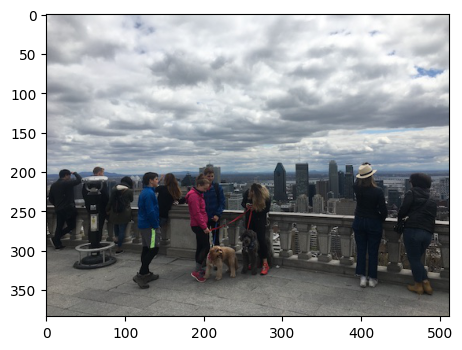

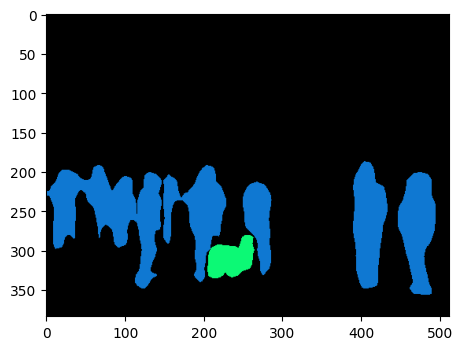

In [8]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)
plt.figure(dpi=100)
plt.imshow(input_image)
plt.show()

plt.figure(dpi=100)
plt.imshow(r)
plt.show()